# Bank Telemarketing Campaign Case Study.

In this case study you’ll be learning Exploratory Data Analytics with the help of a case study on "Bank marketing campaign". This will enable you to understand why EDA is a most important step in the process of Machine Learning.

#### Problem Statement:

 

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate. 

#### Importing the libraries.

In [3]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [1]:
#import the useful libraries.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# for creating matplotlib inline
%matplotlib inline

import seaborn as sns

# Session- 1, Data Cleaning 

### Segment- 2, Data Types 

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame. 

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type** 
- **Coordinates type of data**: latitude and longitude type.


#### Read in the Data set. 

In [4]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0 = pd.read_csv("bank_marketing_updated_v1.csv")

In [5]:
#Print the head of the data frame.
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Segment- 3, Fixing the Rows and Columns 

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately. 
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.


#### Read the file without unnecessary headers.

In [5]:
#read the file in inp0 without first two rows as it is of no use.

# method 1 by assigning headers
inp1 = pd.read_csv("bank_marketing_updated_v1.csv",header=[2])


In [6]:
#print the head of the data frame.
inp1.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [7]:
#read the file in inp0 without first two rows as it is of no use.

# method 2 by skipping first two rows
inp1_2 = pd.read_csv("bank_marketing_updated_v1.csv",skiprows=2)


In [8]:
#print the head of the data frame.
inp1_2.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dropping customer id column. 

In [9]:
#drop the customer id as it is of no use.
inp1.drop("customerid", axis=1, inplace=True)

here
- inplace = True , the data is modified in place, which means it will return nothing and the dataframe is now updated.
- inplace = False , which is the default, then the operation is performed and it returns a copy of the object. You then need to save it to something

#### Dividing "jobedu" column into job and education categories. 

In [10]:
#Extract job in newly created 'job' column from "jobedu" column.
inp1['job']= inp1["jobedu"].apply(lambda x : x.split(",")[0])

In [11]:
# check it into database
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       45191 non-null  float64
 1   salary    45211 non-null  int64  
 2   balance   45211 non-null  int64  
 3   marital   45211 non-null  object 
 4   jobedu    45211 non-null  object 
 5   targeted  45211 non-null  object 
 6   default   45211 non-null  object 
 7   housing   45211 non-null  object 
 8   loan      45211 non-null  object 
 9   contact   45211 non-null  object 
 10  day       45211 non-null  int64  
 11  month     45161 non-null  object 
 12  duration  45211 non-null  object 
 13  campaign  45211 non-null  int64  
 14  pdays     45211 non-null  int64  
 15  previous  45211 non-null  int64  
 16  poutcome  45211 non-null  object 
 17  response  45181 non-null  object 
 18  job       45211 non-null  object 
dtypes: float64(1), int64(6), object(12)
memory usage: 6.6+ MB


In [12]:
#Extract education in newly created 'education' column from "jobedu" column.
inp1['education']= inp1["jobedu"].apply(lambda x: x.split(",")[1])

In [13]:
# check it into database
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45191 non-null  float64
 1   salary     45211 non-null  int64  
 2   balance    45211 non-null  int64  
 3   marital    45211 non-null  object 
 4   jobedu     45211 non-null  object 
 5   targeted   45211 non-null  object 
 6   default    45211 non-null  object 
 7   housing    45211 non-null  object 
 8   loan       45211 non-null  object 
 9   contact    45211 non-null  object 
 10  day        45211 non-null  int64  
 11  month      45161 non-null  object 
 12  duration   45211 non-null  object 
 13  campaign   45211 non-null  int64  
 14  pdays      45211 non-null  int64  
 15  previous   45211 non-null  int64  
 16  poutcome   45211 non-null  object 
 17  response   45181 non-null  object 
 18  job        45211 non-null  object 
 19  education  45211 non-null  object 
dtypes: flo

In [14]:
#drop the "jobedu" column from the dataframe.
inp1.drop("jobedu",axis=1,inplace=True)

In [15]:
# check it into database
inp1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


### Segment- 4, Impute/Remove missing values 

__Take aways from the lecture on missing values:__

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

__Types of missing values:__
- **MCAR(Missing Completly at Random)**: It stands for Missing completely at random (the reason behind the missing value is __not dependent__ on any other feature).
- **MAR(Missing at Random)**: It stands for Missing at random, It could be __some dependence__ (the reason behind the missing value may be associated with some other features).
- **MNAR(Missing not at Random)**: It stands for Missing not at random (there is a __specific reason behind the missing value__).


In [16]:
# check which columns have missing values
inp1.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [17]:
inp1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


#### handling missing values in age column.

In [18]:
#count the missing values in age column.
inp1.age.isnull().sum()

20

In [19]:
#pring the shape of dataframe inp0
inp1.shape

(45211, 19)

In [20]:
#calculate the percentage of missing values in age column.
float((20/45211)*100)

0.0442370219636814

Drop the records with age missing.

In [21]:
#drop the records with age missing in inp1.
inp1 = inp1[~inp1.age.isnull()]
inp1.shape

(45191, 19)

In [22]:
# verify the null values of age
inp1.age.isnull().sum()

0

#### handling missing values in month column

In [23]:
#count the missing values in month column in inp1.
inp1.month.isnull().sum()

50

In [24]:
#print the percentage of each month in the data frame inp1.
inp1.month.value_counts(normalize=True) #normalise=True means it will give you percentage(in form of (0-1)) of each unique value 

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

fill the missing values with mode value

In [25]:
#find the mode of month in inp1
month_mode = inp1.month.mode()[0]  # extracting from above return values
month_mode

'may, 2017'

In [26]:
# fill the missing values with mode value of month in inp1.
inp1.month.fillna(month_mode,inplace=True)

In [27]:
# lets verify it
inp1.month.value_counts(normalize=True)
# here you see the % of "may, 2017" slightly increasing it means values are added to "may, 2017".

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [28]:
#let's see the null values in the month column.
inp1.month.isnull().sum()

0

**Imputation on categorical/numeric columns:**

- __Categorical column:__ 

    Impute the most popular category.
    
    Imputation can be done using logistic regression techniques.


- __Numerical column:__

    Impute the missing value with mean/median/mode.

    The other methods to impute the missing values involve the use of interpolation, linear regression. These methods are useful for continuous numerical variables.

#### handling missing values in response column 

In [29]:
#count the missing values in response column in inp1.
inp1.response.isnull().sum()

30

In [30]:
#calculate the percentage of missing values in response column.
inp1.response.count()

float(30/45161)*100

0.06642899847213304

Target variable is better of not imputed.
- Drop the records with missing values.

In [31]:
#drop the records with response missings in inp1.
inp1 = inp1[~inp1.response.isnull()]

In [32]:
# verify it
inp1.response.isnull().sum()

0

In [33]:
#calculate the missing values in each column of data frame: inp1.
inp1.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

#### handling pdays column. 

In [34]:
#describe the pdays column of inp1.
inp1.pdays.describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- you should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [35]:
# replace -1 value with NaN value
inp1.loc[inp1.pdays<0,"pdays"] = np.NaN

In [36]:
#describe the pdays column with considering the -1 values.
inp1.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

**Important take away from pdays columns**</br>
 - Missing value doesn't always have to be present as null! 


### Segment- 5, Handling Outliers 

__Definition of outliers__:

Outliers are values that are much beyond or far from the next nearest data points.

__Types of Outliers__
 - **Univariate outliers:** Univariate outliers are those data points in a variable whose values lie beyond the range of expected values.

<center> <b>Outliers and Anomalies</b></center>

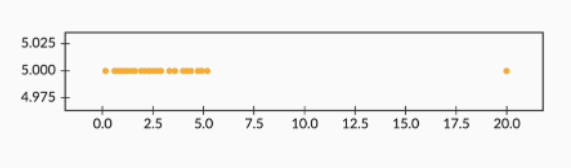


    From the above image,
    Almost all the points lie between 0 and 5.0, and one point is extremely far away (at 20.0) from the normal norms of this data set.

 - **Multivariate outliers:** While plotting data, some values of one variable may not lie beyond the expected range, but when you plot the data with some other variable, these values may lie far from the expected value. These are called multivariate outliers.

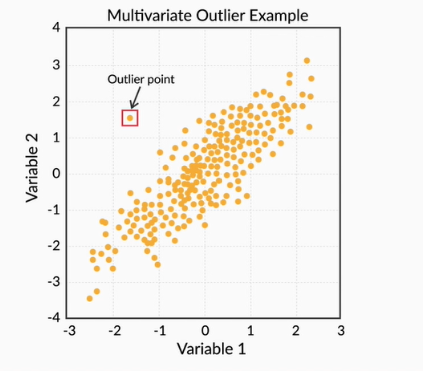

**Causes of Outliers**
 - Investigate the cause

__Major approaches to the treat outliers:__
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable 

In [37]:
#describe the age variable in inp1.
inp1.age.describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

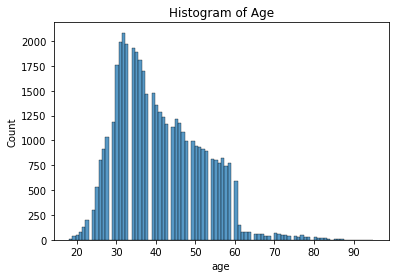

In [38]:
#plot the histogram of age variable.
sns.histplot(inp1.age)
plt.title("Histogram of Age")
plt.show()

  From histogram i cant see any outliers so try another method to find outliers which is Boxplot

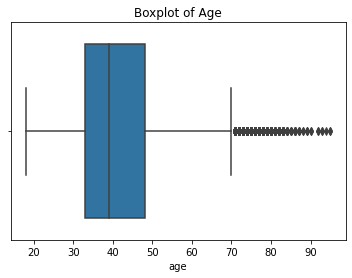

In [39]:
#plot the boxplot of age variable.
sns.boxplot(inp1.age)
plt.title("Boxplot of Age")
plt.show()

Judgement

you have seen that the age variable has outliers, but these can be treated as the normal values of age because any person can be over 70 or 80 years of age. Also, the 70-90 age group is sparsely populated and participate in opening the term deposit account, which is why these set of people fall out of the box plot but they are not outliers and can be considered as normal values.

#### Salary variable 

In [40]:
#describe the salary variable of inp1.
inp1.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

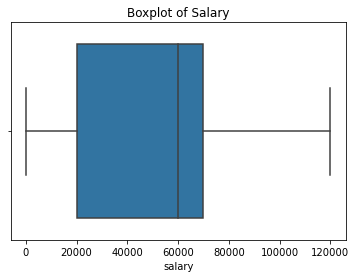

In [41]:
#plot the boxplot of salary variable.
sns.boxplot(inp1.salary)
plt.title("Boxplot of Salary")
plt.show()

Judgement

There are no Outliers.

#### Balance variable 

In [42]:
#describe the balance variable of inp1.
inp1.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

so from above salary are not negative<br>
and mean and median difference is too much

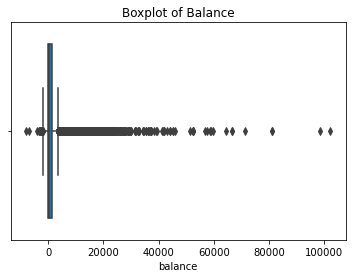

In [43]:
#plot the boxplot of balance variable.
sns.boxplot(inp1.balance)
plt.title("Boxplot of Balance")
plt.show()

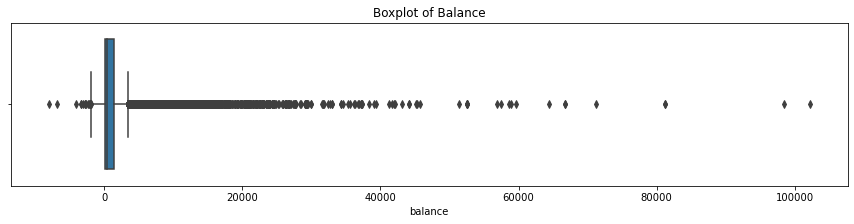

In [44]:
#plot the boxplot of balance variable after scaling in 15:3.
plt.figure(figsize=[15,3])
sns.boxplot(inp1.balance)
plt.title("Boxplot of Balance")
plt.show()

In [45]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp1.balance.quantile([0.5,0.7,0.9,0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3576.0
0.95     5769.0
0.99    13173.4
Name: balance, dtype: float64

from above only 1% people has balance of 13173 that is too high respectively and max is 102127

In [46]:
# let's examine the high balance records
inp1[inp1.balance>15000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


show mean data <br>
it says that the averaage salary is higher who are responded previously <br>
i think these people are important for this campain<br> 

insted of looking at mean, we could look at Quantiles/percentiles/medians insted

### Segment- 6, Standardising values 

- **Scaling Example**<br>
Scaling ensures that the values in a dataset have a common scale; this makes it easy to perform data analysis. Let's take a data set that contains the grades of students studying in different universities. Some of the universities assign grades on a scale of 4, whereas the others assign grades on a scale of 10. Hence, you cannot assume that a GPA of 3 on a scale of 4 is equal to a GPA of 3 on a scale of 10, even though they are the same quantitatively. Thus, for the purpose of analysis, these values need to be brought to a common scale, such as the percentage scale.

**Checklist for data standardization on Numbers:**
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.

**Checklist for data standardization on Texts/Values:**
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

#### Duration variable

In [47]:
#describe the duration variable of inp1
inp1.duration.describe()

count       45161
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [48]:
# let's look at duration variable of inp1:
inp1.duration.head(10)

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
5    139 sec
6    217 sec
7    380 sec
8     50 sec
9     55 sec
Name: duration, dtype: object

it means duration values are in sec / min format and dtype is object

In [49]:
# Make convert_to_min function to convert (sec values to min in form of float) & (min values to print as it is in form of float)
convert_to_min = lambda x : float(x.split()[0])/60 if x.find("sec") else float(x.split()[0])
convert_to_min("60 sec")

1.0

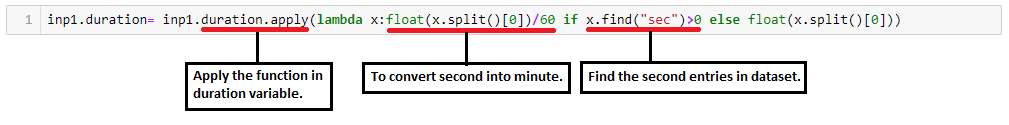

In [50]:
# apply convert_to_min function to duration column
inp1.duration = inp1.duration.apply(convert_to_min)

In [51]:
#describe the duration variable
inp1.duration.describe()

count    45161.000000
mean         1.387984
std          3.078065
min          0.000000
25%          0.037222
50%          0.083333
75%          1.516667
max         64.683333
Name: duration, dtype: float64

### Segment- 7, Fixing Invalid Values 

If your data set has invalid values, and if you do not know which accurate values could replace the invalid values, then it is recommended that you treat these values as missing. For example, if the Contacts columns in a data set contain a string ‘tr8ml’, then it is recommended that you remove the invalid value and treat it as a missing value.

**Checklist for Data Cleaning:**

 - **Encode unicode properly:** In case the data is being read as junk characters, try to change the encoding, for example, use CP1252 instead of UTF-8.<br>

 - __Convert incorrect data types:__ Change the incorrect data types to the correct data types for ease of analysis. For example, if numeric values are stored as strings, then it would not be possible to calculate metrics such as mean, median, etc. Some of the common data type corrections include changing a string to a number ("12,300" to “12300”), a string to a date ("2013-Aug" to “2013/08”), a number to a string (“PIN Code 110001” to "110001"), etc.<br>

 - __Correct the values that lie beyond the range:__ If some values lie beyond the logical range, for example, temperature less than -273° C (0° K), then you would need to correct those values as required. A close look at the data set would help you determine whether there is scope for correction or the value needs to be removed.<br>

 - __Correct the values not belonging in the list:__ Remove the values that do not belong to a list. For example, in a data set of blood groups of individuals, strings ‘E’ or ‘F’ are invalid values and can be removed.<br>

 - __Fix incorrect structure:__ Values that don’t follow a defined structure can be removed from a data set. For example, in a data set containing the pin codes of Indian cities, a pin code of 12 digits would be an invalid value and would need to be removed. Similarly, a phone number of 12 digits would be an invalid value.<br>

 - __Validate internal rules:__ Internal rules, if present, should be correct and consistent. For example, the date of a product’s delivery should definitely come after the date of purchase.<br>



### Segment- 8, Filter Data 

**Checklist for Filter Data:**

 - __Deduplicate Data:__ Remove identical rows and the rows in which some columns are identical.<br>
 
 - __Filter Rows:__ Filter rows by segment and date period to obtain only rows relevant to the analysis.</br>

 - __Filter columns:__ Filter columns relevant to the analysis.</br>

 - __Aggregate data:__ Group by the required keys and aggregate the rest.</br>

# Session 2 - Univariate Analysis 

### Univariate Analysis four types:-

1) Categorical unordered univariate analysis<br>
2) Categorical ordered univariate analysis<br>

3) Statistics on the numerical variable<br>
4) Numerical variable univariate analysis

### 1) Categorical unordered univariate analysis 

Unordered data is the type of data that does not have any measurable terms (measurable terms can be like high-low, more-less, fail-pass, etc.) unordered is also called **Nominal variable**

__Example :-__

- The type of loan taken by an individual (home loan, personal loan, auto loan, etc.) does not have any ordered notion. They are just different types of loans.

- Departments of an organisation — Sales, Marketing, HR — are different departments in an organization, with no measurable attribute attached to any term.

Unordered data do not have the notion of high-low, more-less etc. 
Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.



#### Marital status 
The column "marital" is a categorical type of column, but there have unordered categorical data, there is no order

In [52]:
#calculate the percentage of each marital status category. 
inp1.marital.value_counts(normalize=True)

married     0.601957
single      0.282943
divorced    0.115099
Name: marital, dtype: float64

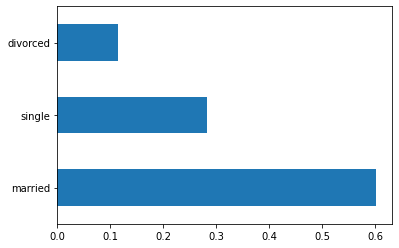

In [53]:
#plot the bar graph of percentage marital status categories
inp1.marital.value_counts(normalize=True).plot.barh()
plt.show()

#### Job  
job column in the Bank Marketing dataset, 'job' is divided into many sub-categories like technician, blue-collar, services, management, etc. <br>There is no weight or measure given to any value in the 'job' column.

In [54]:
#calculate the percentage of each job status category.
inp1.job.value_counts(normalize=True)

blue-collar      0.215274
management       0.209273
technician       0.168043
admin.           0.114369
services         0.091849
retired          0.050087
self-employed    0.034853
entrepreneur     0.032860
unemployed       0.028830
housemaid        0.027413
student          0.020770
unknown          0.006377
Name: job, dtype: float64

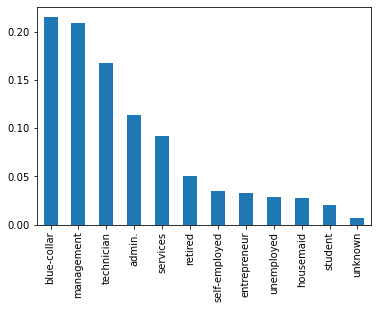

In [55]:
#plot the bar graph of percentage job categories
inp1.job.value_counts(normalize=True).plot.bar()
plt.show()

### 2) Categorical ordered univariate analysis 

Ordered variables are those variables that follow a natural rank of order. Ordered variables have some kind of ordering.<br><br>
Some examples of categorical ordered variables from the Bank Marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education

In [56]:
#calculate the percentage of each education category.
inp1.education.value_counts(normalize=True)

secondary    0.513275
tertiary     0.294192
primary      0.151436
unknown      0.041097
Name: education, dtype: float64

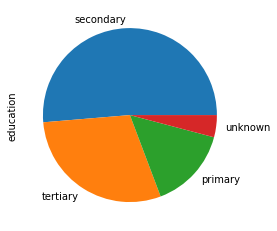

In [57]:
#plot the pie chart of education categories
inp1.education.value_counts(normalize=True).plot.pie()
plt.show()

#### poutcome 

In [58]:
#calculate the percentage of each poutcome category.
inp1.poutcome.value_counts(normalize=True)*100

unknown    81.751954
failure    10.836784
other       4.072098
success     3.339164
Name: poutcome, dtype: float64

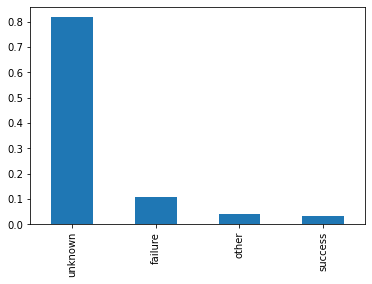

In [59]:
# plot the bar chart
inp1.poutcome.value_counts(normalize=True).plot.bar()
plt.show()

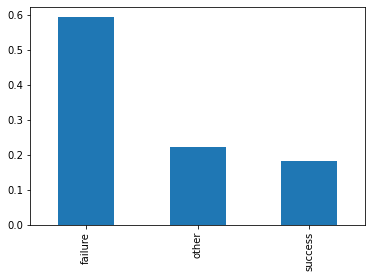

In [60]:
# plot bar chart without unknown category
inp1[~(inp1.poutcome=="unknown")].poutcome.value_counts(normalize=True).plot.bar()
plt.show()

#### Response the target variable 

In [61]:
#calculate the percentage of each response category.
inp1["response"].value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

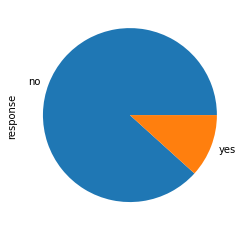

In [62]:
#plot the pie chart of response categories
inp1["response"].value_counts(normalize=True).plot.pie()
plt.show()

### The major takeaways from Univariate Analysis

- You have seen that education, poutcome and response are the ordered categorical variables. 

- The bank has primarily contacted those customers who have completed their secondary education.

- For the majority of the customers, the previous campaign has not been conducted. 

## Question : <br><br>Ordered Categorical Variables

**Suppose you are given a data set containing the salary details of the citizens of a tier-2 city. The salaries are not provided in a numerical format but is given qualitatively, for instance, higher salary, above-average salary, average salary, below average salary and no income. Based on this data, how can you determine the standard of living of the citizens of this city? What steps would you follow in order to dissect this information?**

### Answer :
First, you should plot the histogram of each category of salary, or you can find the count of each salary group in the data set. Once you have done this, you can predict which category has the highest count, and based on that information, you can predict the standard of living of the people in this city. Suppose you find that the maximum count is for the below-average salary category and the second highest is for the average salary category; thus, you can conclude that the standard of living of the city’s residents is not very high.

### 3) Statistics on Numerical Features

### Transition of a numerical variable into an ordered categorical variable

 

Let’s consider a very interesting example of your school life. Suppose you have a dataset containing the marks of all the students in the 'Science' subject, and you are one of the students in that group. These marks can be considered as categorical if you divide the total marks into different categories like High, Medium, Average, Below Average, Poor. From this analysis, you can determine your ranking in the class and also find out how many students got more marks than you and how far away your score is from the mean or the average score. <br>

 

The important thing to note here is that your marks are a numerical variable, which you have then categorised into 'high marks' and 'low marks'. This is an approach that you will need to adopt in the future, and you will learn more about this approach.

### uantitative or numeric variables.

Numeric variables can be continuous like height, temperature, weight, etc. <br>
Numerical variables can also be discrete like the number of items bought by a customer in a store, the number of people in a city, the number of 'heads' you get when flipping three coins.

### Bining
Bining means convert numerical data into categorical ordered data in bucket wise.<br>
ex: you can deliberately convert the numeric variables into ordered categorical; for example, if you have the incomes of a few thousand people, which range from 5,000 to 1,00,000, then you can categorise them into bins such as [5000, 10000], [10000,15000] and [15000, 20000].<br>

This is called 'binning'. 

### Mean vs Median 
Mean and median are single values that broadly give a representation of the entire data. As Anand states clearly, it is very important to understand when to use these metrics to avoid inaccurate analysis.


While 'mean' gives an average of all the values, the 'median' gives a typical value that can be used to represent the entire group. As a simple rule of thumb, always question someone if they use 'mean' since 'median' is primarily a better measure of ‘representativeness’.

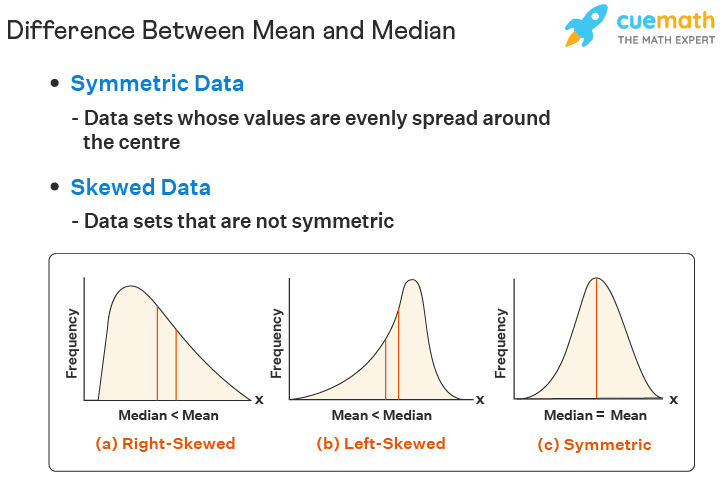

Both standard deviation and interquartile difference are used to represent the spread of the data.<br>

 

The interquartile difference is a much better metric than standard deviation if there are outliers in the data because the standard deviation will be influenced by outliers, while the interquartile difference will simply ignore them.

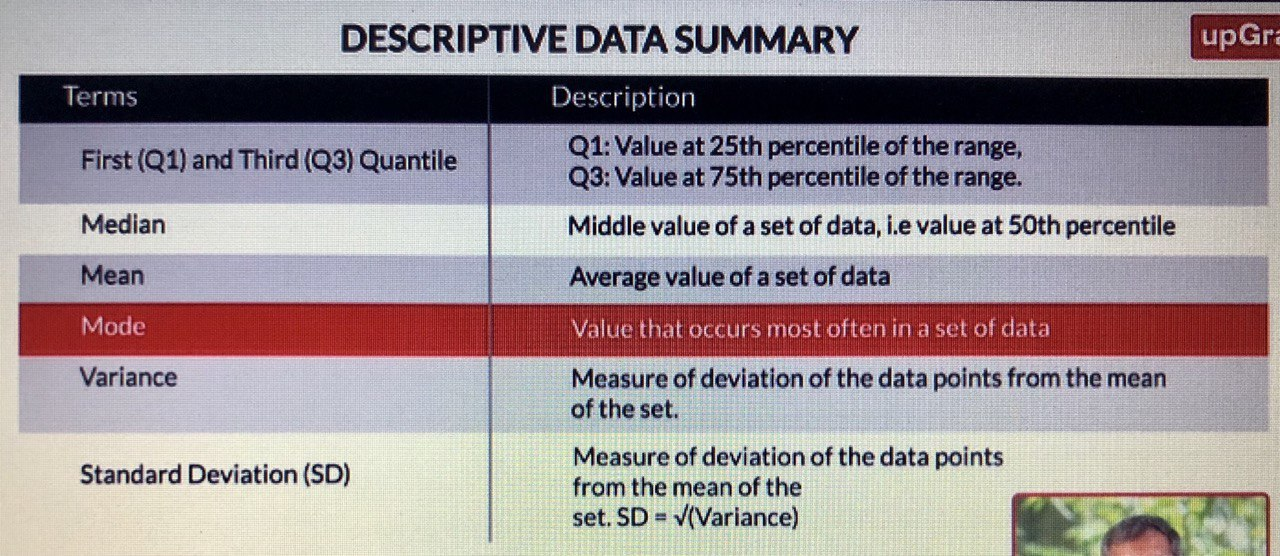

# Session- 3  Bivariate 

- 1) Analysis Between Two Numeric Variables
- 2) Analysis Between Numeric and Categorical Variables
- 3) Correlation Versus Causation
- 4) Analysis Between Two Categorical Variables
- 5) Multivariate Analysis

## 1) Numeric- numeric (Two Numerical) Analysis 

**correlation coefficient** -
correlation coefficient depicts only a **linear relationship between numerical variables**. It does not depict any other relationship between variables.<br>
- **zero correlation** does not imply that there is **no relation between variables**; it merely indicates that there will no linear relationship between them.
- **Negative correlation** means that if the value of **one variable increases, the value of another decreases**
- **Positive correlation** is oposite of negative correlation means that if the value of **one variable increases, the value of another increase**.<br><br>

The higher the coefficient of correlation between numerical variables, the higher the linear relation between them.

**Example**

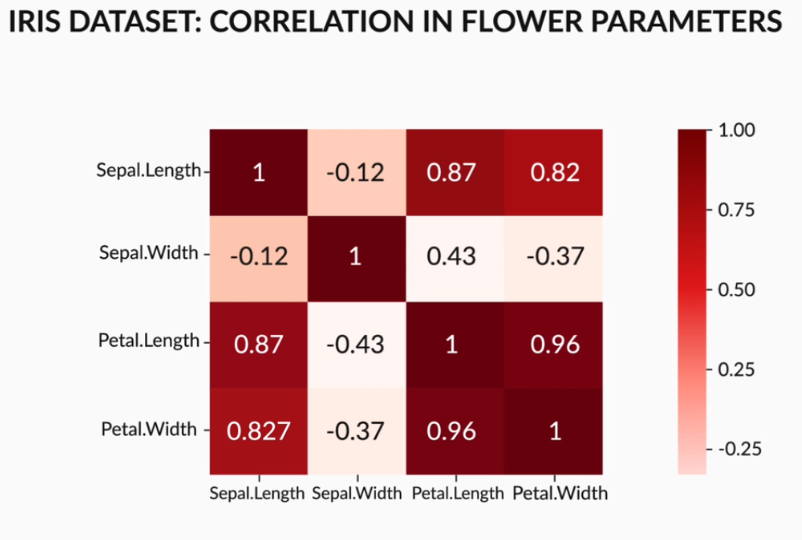

- From the correlation matrix below, you can observe that petal length has a high correlation with sepal length, with a correlation coefficient of 0.87. Also, there is a very high correlation coefficient of 0.96 between petal width and petal length.

**Note:** The value of the correlation between Petal Length and Sepal Width is -0.43 and not 0.43 at both the places of the below correlation matrix.

**There are three ways to analyse the numeric- numeric data types simultaneously.**
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

### Scatter Plot

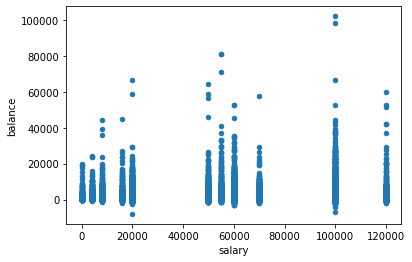

In [63]:
#plot the scatter plot of balance and salary variable in inp1
inp1.plot.scatter(x="salary",y="balance")
plt.show()

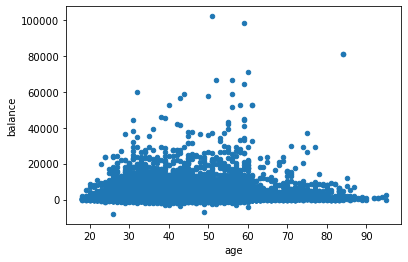

In [64]:
#plot the scatter plot of balance and age variable in inp1
inp1.plot.scatter(x="age",y="balance")
plt.show()

### Pair Plot

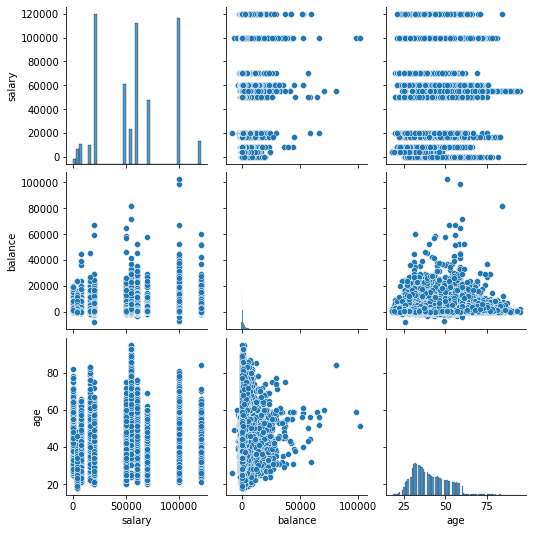

In [65]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data=inp1,vars=["salary","balance","age"])
plt.show()

### Conclusion of Scatter and Pair Plot

A high correlation coefficient does not imply that there will be a correlation with another numeric variable every time because there can be no causation between them. There may be cases where you will see a high correlation coefficient between two variables but there is no relation between them. You will understand this in detail in the next segment that how correlation is related to the causation.


### Correlation Matrix

In [66]:
# correlation matrix of salary, balance and age in inp1 dataframe.
inp1[["age","salary","balance"]].corr()

,age,salary,balance
age,1.000000,0.024513,0.097710
salary,0.024513,1.000000,0.055489
balance,0.097710,0.055489,1.000000


#### Correlation heat map 

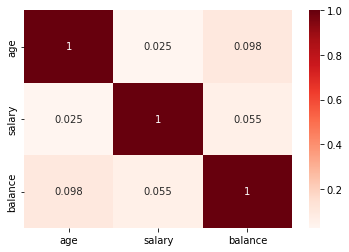

In [67]:
sns.heatmap(inp1[["age","salary","balance"]].corr(), annot=True, cmap="Reds")
plt.show()

## Correlation Questions


### Consider the following four scatter plots of two variables A and B.

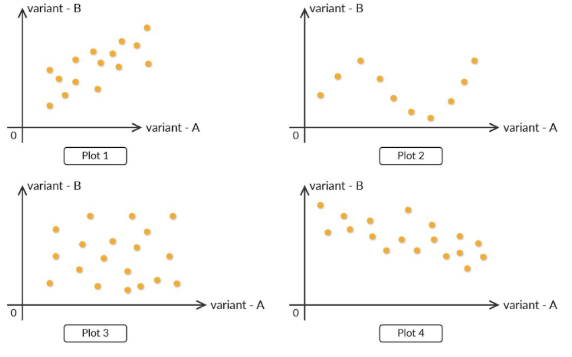

### Q-1 Out of the four plots, which has the least correlation coefficient? 
<br>

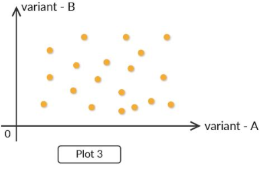

### Ans 1:
Plot-3 does not show any relation between the variables; hence, it has the least correlation coefficient.


- ### Q-2 Which of the plots above has very a low correlation coefficient but has some relation between the variables? 
<br>

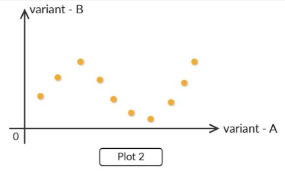

### Ans 2:
There is some relation between the variables in Plot-2, but it is not linear.

- ### Q-3 Which of the plots above has a negative correlation?
<br>

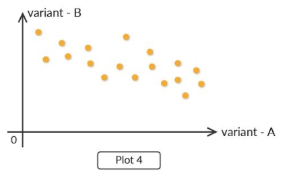

### Ans 3:
In Plot-4, with increase in one variable, the other variable decreases; hence, there is a negative correlation between the variables.


##  Correlation vs Causation

**Spurious Correlations**- it means that there are nothing related to each other but in graph we can see correlation. so this type of things is called Spurious Correlations.

**Some Exaples of Spourious Correlations**

__Example 1__<br>
    
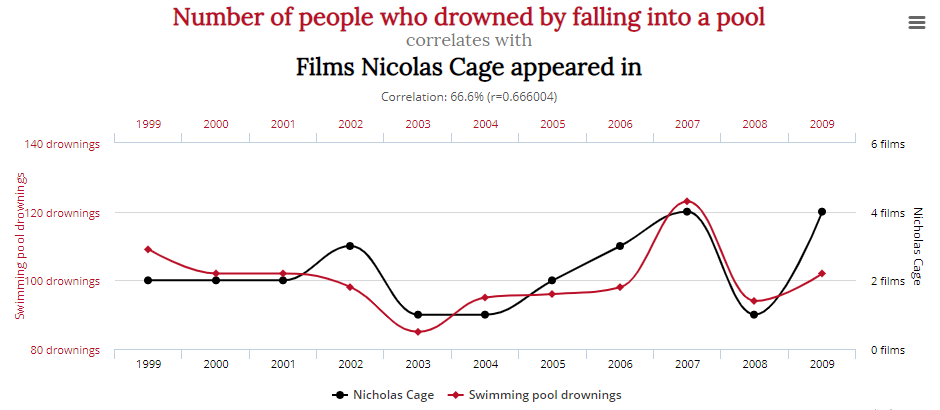

<justify>you saw that the number of people who drowned by falling into a pool is not related to movies starring Nicolas Cage. However, if you observe the plot below, you will notice that there is a very high correlation between them, as both the plots follow almost the same path.</justify>
<br><br>

__Example 2__<br>

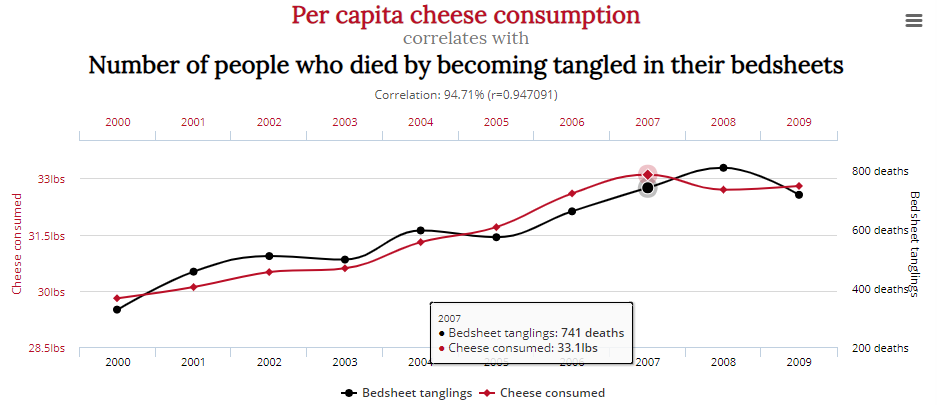

<justify>it is quite obvious that the per capita cheese consumption has no relation with people dying from being tangled in bed sheets, although the plot shows a high relation between them.</justify>

## 2) Numerical categorical variable

### Salary vs response 

In [68]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
inp1.groupby(["response"])["salary"].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [69]:
#groupby the response to find the median of the salary with response no & yes seperatly.
inp1.groupby(["response"])["salary"].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

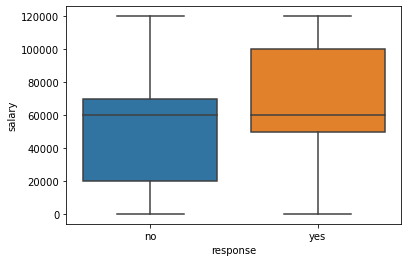

In [70]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data=inp1, x="response", y="salary")
plt.show()

### Conclusion of Salary vs response 

However, a very different picture emerges when you plot a boxplot. The interquartile range for customers who gave a positive response is on the higher salary side. This is actually true, because people who have higher salaries are more likely to invest in term deposits.

#### Balance vs response 

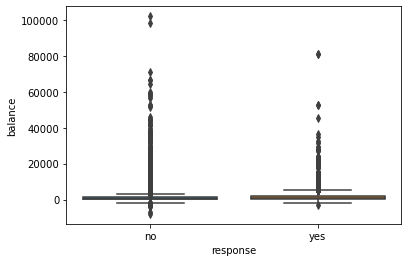

In [71]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(data=inp1, y="balance", x="response")
plt.show()

After the balance versus response graph is plotted, it does not make any sense at first glance. Sometimes only a boxplot is not sufficient to draw insights, because of a high concentration of data and or because of higher values in the data set, for example, the balance variable.<br>

In such cases, it is a good practice to analyse the data using mean, median or quartiles. In the video, you saw that the mean and median values of the balance variable are higher for customers who gave a positive response, which is again true, because people who have higher balance in their bank accounts are more likely to invest in term deposits.

In [72]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp1.groupby(["response"])["balance"].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [73]:
#groupby the response to find the median of the balance with response no & yes seperatly.
inp1.groupby(["response"])["balance"].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

##### 75th percentile 

In [74]:
#function to find the 75th percentile.
def per75(x):
    return np.quantile(x, 0.75)

In [75]:
#calculate the mean, median and 75th percentile of balance with response
inp1.groupby("response")["balance"].aggregate(["mean","median",per75])

,mean,median,per75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


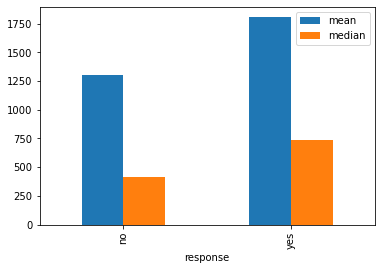

In [76]:
#plot the bar graph of balance's mean an median with response.
(inp1.groupby("response")["balance"].aggregate(["mean","median"])).plot.bar()
plt.show()

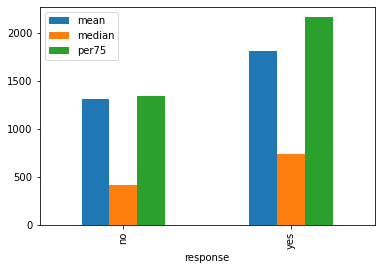

In [77]:
#plot the bar graph of balance's mean, median, ,per75 with response.
(inp1.groupby("response")["balance"].aggregate(["mean","median",per75])).plot.bar()
plt.show()

#### Education vs salary 

In [78]:
#groupby the education to find the mean of the salary education category.
inp1.groupby("education")["salary"].mean()

education
primary      34232.343910
secondary    49731.449525
tertiary     82880.249887
unknown      46529.633621
Name: salary, dtype: float64

In [79]:
#groupby the education to find the median of the salary for each education category.
inp1.groupby("education")["salary"].median()

education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

#### Job vs salary

In [80]:
#groupby the job to find the mean of the salary for each job category.
inp1.groupby("job")["salary"].mean()

job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

<AxesSubplot:xlabel='job'>

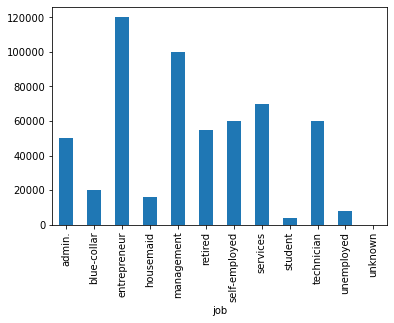

In [81]:
inp1.groupby("job")["salary"].mean().plot.bar()

<AxesSubplot:xlabel='job'>

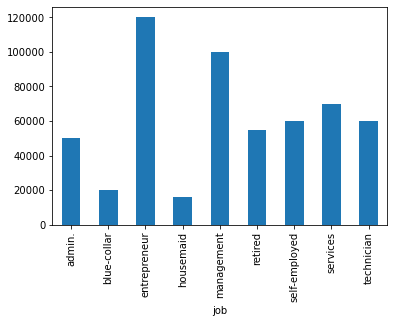

In [82]:
# from job category "student","unemployed","unknown" are not a salaried person so we will exclude it.

inp1[~(inp1.job.isin(["student","unemployed","unknown"]))].groupby("job")["salary"].mean().plot.bar()

### Conclusion 
When you calculate the mean value of salary for different job categories, the entrepreneur and management job categories emerge as the highest-paying jobs. The management job category is directly related to a higher education level, and hence, a higher salary is expected for such a job category. The lowest salary group is student, which is again true because they are not employed yet.

## 3) Categorical categorical variable 

In [83]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
inp1["response_flag"] = np.where(inp1.response=="yes",1,0)

In [84]:
inp1.response_flag.value_counts()

0    39876
1     5285
Name: response_flag, dtype: int64

In [85]:
inp1.response.value_counts()

no     39876
yes     5285
Name: response, dtype: int64

In [86]:
inp1.response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

In [87]:
inp1.response_flag.mean()

0.1170257523084077

#### Education vs response rate

In [88]:
#calculate the mean of response_flag with different education categories.
inp1.groupby("education")["response_flag"].mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

### Conclusion 
you saw that the positive response of customers to opening a term deposit with the bank increases with the education level. From this, you can infer that the bank should contact people with higher education levels to effectively increase the positive response for opening a term deposit.

#### Marital vs response rate 

In [89]:
#calculate the mean of response_flag with different marital status categories.
inp1.groupby("marital")["response_flag"].mean()

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

<AxesSubplot:xlabel='marital'>

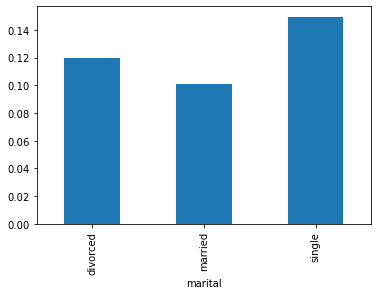

In [90]:
#plot the bar graph of marital status with average value of response_flag
inp1.groupby("marital")["response_flag"].mean().plot.bar()

### Conclusion 
based on marital status analysis, you can infer that single individuals have a higher positive response rate. This could be due to various reasons: One reason could be that compared with other categories of customers, single individuals have available income to deposit in long-term savings accounts (term deposit). Hence, the campaign should target single customers.

#### Loans vs response rate 

<AxesSubplot:xlabel='loan'>

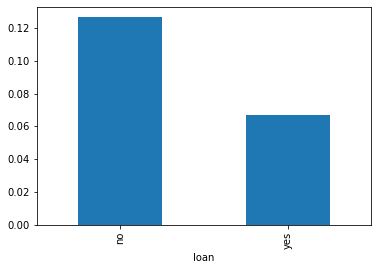

In [91]:
#plot the bar graph of personal loan status with average value of response_flag
inp1.groupby("loan")["response_flag"].mean().plot.bar()

#### Housing loans vs response rate 

<AxesSubplot:xlabel='housing'>

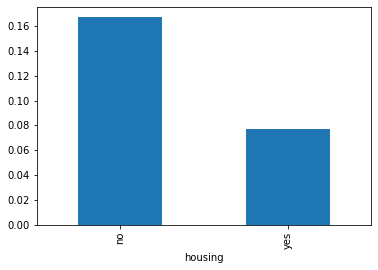

In [92]:
#plot the bar graph of housing loan status with average value of response_flag
inp1.groupby("housing")["response_flag"].mean().plot.bar()

### Conclusion 
Another very interesting inference is that people who have not purchased any housing or personal loan are more likely to open a term deposit account with the bank. This is true, probably because people who have already availed loans may not have the necessary funds to invest in a term deposit.

#### Age vs response 

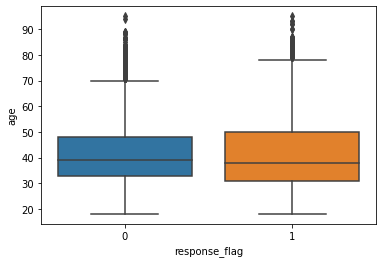

In [93]:
#plot the boxplot of age with response_flag
sns.boxplot(data=inp1, x="response_flag", y="age")
plt.show()

##### making buckets from age columns 

In [94]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
inp1["age_group"] = pd.cut(inp1.age, bins=[0,30,40,50,60,9990], labels=["<30","30-40","40-50","50-60","60+"])

In [95]:
# age_group % by category
inp1.age_group.value_counts(normalize=True)

30-40    0.391090
40-50    0.248688
50-60    0.178406
<30      0.155555
60+      0.026262
Name: age_group, dtype: float64

In [96]:
# cpmpare age_group with response_flag
inp1.groupby("age_group")["response_flag"].mean()

age_group
<30      0.162847
30-40    0.102537
40-50    0.090731
50-60    0.100410
60+      0.423272
Name: response_flag, dtype: float64

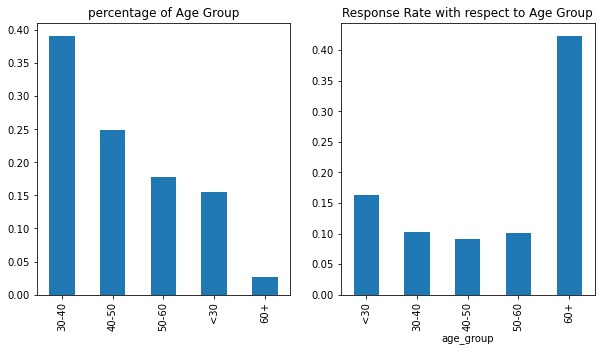

In [101]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
inp1.age_group.value_counts(normalize=True).plot.bar()
plt.title("percentage of Age Group")
plt.subplot(1,2,2)
inp1.groupby("age_group")["response_flag"].mean().plot.bar()
plt.title("Response Rate with respect to Age Group")
plt.show()

### Conclusion

- **Plot-1** <br>
You can observe that the bank has mostly contacted people in the age group of 30-50, and have made much less contact with people in the age group of 60+ 
<br>

- **Plot-2** <br>
The chances of getting a positive response are higher from the people who are in the age group of 50+ or 60+ 

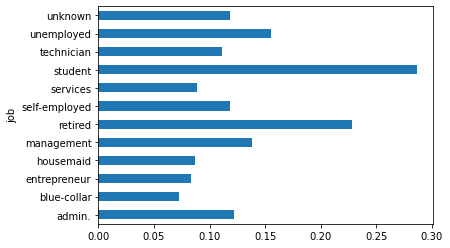

In [104]:
#plot the bar graph of job categories with response_flag mean value.
inp1.groupby("job")["response_flag"].mean().plot.barh()
plt.show()

#### Conclusion

students & Retired has highest response rate where as blue-collor job has lower response rate

# Session- 4   Multivariate Analysis

One of the key features of multivariate analysis is that it gives you a very precise idea about the various elements, since you are now combining multiple variables to visualise the data set.

#### Education vs marital vs response 

In [107]:
#create heat map of education vs marital vs response_flag

pt1 = pd.pivot_table(data=inp1, index="education", columns="marital", values="response_flag")
pt1

marital,divorced,married,single
education,,,
primary,0.138852,0.075601,0.106808
secondary,0.103559,0.094650,0.129271
tertiary,0.137415,0.129835,0.183737
unknown,0.142012,0.122519,0.162879


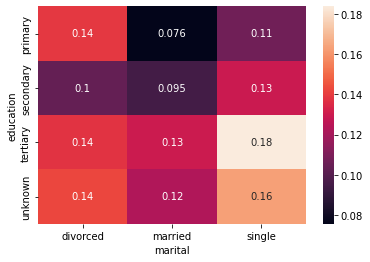

In [110]:
sns.heatmap(pt1, annot=True)
plt.show()

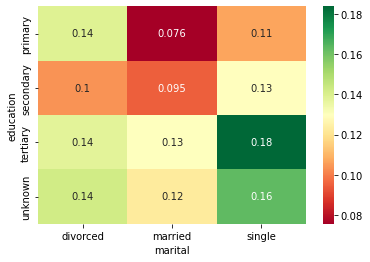

In [112]:
sns.heatmap(pt1, annot=True, cmap="RdYlGn")    
# in cmap Rd - Red - Higher value
#         Yl - Yellow - center value 
#         Gn - green - Lower value 
plt.show()

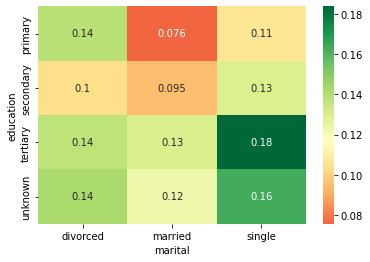

In [114]:
sns.heatmap(pt1, annot=True, cmap="RdYlGn", center=0.117)    
# in center value is mean value of marital
plt.show()

### Conclusion
A three-variable analysis between education, marital status and response. You can see that people who are married and who have completed just their primary education are least likely to give a positive response on term deposits. This can be explained by the fact that people educated only up to the primary level are not aware of the benefits of term investments.  Also, married individuals need money to fulfil their daily needs, and they require cash-on-hand to buy the daily essentials; hence, they won't prefer investing in term deposits.

#### Job vs marital vs response 

In [116]:
#create the heat map of Job vs marital vs response_flag.
pt2 = pd.pivot_table(data=inp1, index="job", columns="marital", values="response_flag")
pt2

marital,divorced,married,single
job,,,
admin.,0.120160,0.113383,0.136153
blue-collar,0.077644,0.062778,0.105760
entrepreneur,0.083799,0.075843,0.113924
housemaid,0.097826,0.072527,0.166667
management,0.127928,0.126228,0.162254
retired,0.283688,0.220682,0.120370
self-employed,0.158273,0.079637,0.191874
services,0.091241,0.074105,0.117696
student,0.166667,0.185185,0.293850


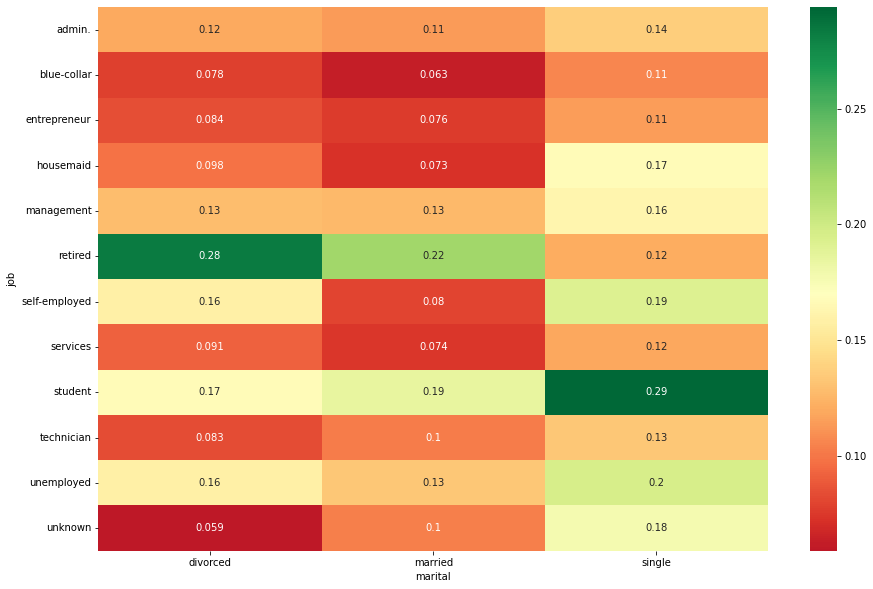

In [130]:
plt.figure(figsize=[15,10])
sns.heatmap(pt2, annot=True, cmap="RdYlGn", center=0.17)
plt.show()

### Conclusion
The combinations of married with blue-collar, entrepreneur and housemaid are least likely to go for term deposits. The highest rate of positive response came from students with single marital status. The bank should, therefore, consider these aspects before taking any decision.

#### Education vs poutcome vs response

In [124]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45161 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            45161 non-null  float64 
 1   salary         45161 non-null  int64   
 2   balance        45161 non-null  int64   
 3   marital        45161 non-null  object  
 4   targeted       45161 non-null  object  
 5   default        45161 non-null  object  
 6   housing        45161 non-null  object  
 7   loan           45161 non-null  object  
 8   contact        45161 non-null  object  
 9   day            45161 non-null  int64   
 10  month          45161 non-null  object  
 11  duration       45161 non-null  float64 
 12  campaign       45161 non-null  int64   
 13  pdays          8246 non-null   float64 
 14  previous       45161 non-null  int64   
 15  poutcome       45161 non-null  object  
 16  response       45161 non-null  object  
 17  job            45161 non-null  

In [129]:
#create the heat map of education vs poutcome vs response_flag.
pt3 =pd.pivot_table(data=inp1, index="education", columns="poutcome", values="response_flag" )
pt3

poutcome,failure,other,success,unknown
education,,,,
primary,0.088785,0.143443,0.609023,0.071821
secondary,0.109007,0.140831,0.641902,0.084244
tertiary,0.168683,0.220994,0.657005,0.114256
unknown,0.158192,0.200000,0.679012,0.101761


<AxesSubplot:xlabel='poutcome', ylabel='education'>

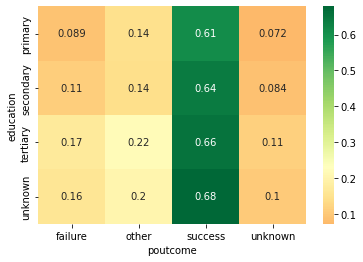

In [131]:
sns.heatmap(pt3, annot=True, cmap="RdYlGn", center=0.23)

### Conclusion
The combinations shows that previous success person has again response with high response rate. where failure has again low response rate

# Summary


Exploratory Data Analysis (EDA) helps a data analyst to look beyond the data. It is a never-ending process—the more you explore the data, the more the insights you draw from it.  As a data analyst, almost 80% of your time will be spent understanding data and solving various business problems through EDA. If you understand EDA properly, that will be half the battle won.

## Four Most Crucial Steps in any kind of Data Analysis

- **Gather data for analysis:** In the data sourcing part, you learnt about the various sources of data. There are majorly two types of data sources, namely, public data and private data. Private data is associated with some security and privacy concerns, whereas public data is freely available to use without any restrictions on access or usage. There are many websites that provide access public data set available. You have also learnt about the basics of web scraping—a process to fetch the data from a web page directly.
<br><br>
- **Preparation and cleaning of data:** In the cleaning process, the main objective is to remove irregularities from a data set. There are many ways to clean data, but the two most important approaches that you learnt as part of the cleaning step are treatment of missing values and outlier handling. 
  - There are many ways to deal with missing values, for example, removing an entire column or rows with missing values; however, you need to keep in mind that it should not hamper the data with loss of information. The other method to deal with missing values is to just impute them with other values such as mean, median, mode or quantiles. The third method is to treat the missing values as a separate category; this is the safest method to deal with missing values.

## Different Methods for Analysing Variables.

- **Univariate analysis:** Univariate analysis involves the analysis of a single variable at a time. Now, there are multiple types of variables, such as categorical ordered and unordered variables, and numerical variables. A univariate analysis gives insights about a single variable and how it varies, and what the counts of each and every category in it are.
<br><br>
- **Bivariate and multivariate analysis:** Bivariate/multivariate analysis involves analysing two or more variables at the same time. These analyses yield very specific insights about a data set. You can infer various findings through bivariate analysis.